CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다. 데이터셋의 각 이미지는 10개의 클래스로 라벨링 되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있습니다.

데이터 로드 및 전처리
CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import utils
from tensorflow.keras.datasets import cifar10

In [2]:
cifar10.load_data

<function keras.datasets.cifar10.load_data()>

In [3]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train,x_val,y_train ,y_val = train_test_split(x_train_full,y_train_full,
                                                test_size=0.2,
                                                random_state=2023)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


* class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

깃헙에서 확인가능

In [4]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

* 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

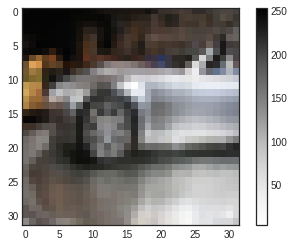

In [5]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [6]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


* 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [7]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape(-1,32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [8]:
print(x_train[0])

[  7   7   6 ... 197 196 199]


In [9]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

# 모델 구성 및 컴파일
* BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [10]:
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(2048))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10,activation='softmax'))

In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
activation_1 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4

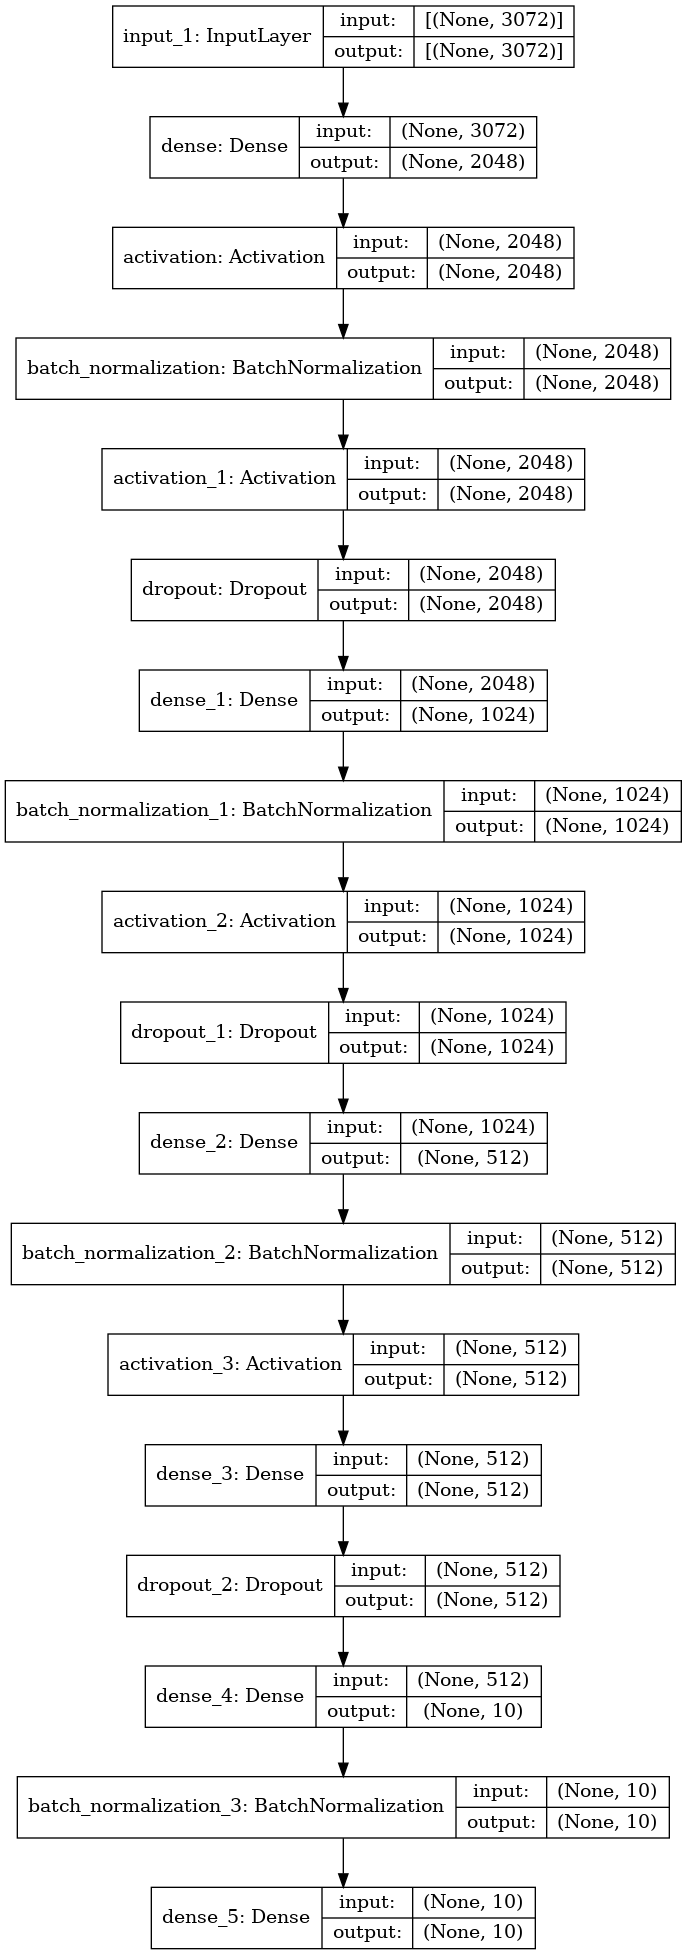

In [13]:
utils.plot_model(model, show_shapes=True)

# 모델 학습
* ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [14]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('sequential', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=200,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/200
1250/1250 [==============================] - 7s 4ms/step - loss: 2.0265 - accuracy: 0.2653 - val_loss: 1.8033 - val_accuracy: 0.3495
INFO:tensorflow:Assets written to: sequential/assets
Epoch 2/200
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8287 - accuracy: 0.3377 - val_loss: 1.6873 - val_accuracy: 0.3906
INFO:tensorflow:Assets written to: sequential/assets
Epoch 3/200
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7658 - accuracy: 0.3630 - val_loss: 1.6522 - val_accuracy: 0.4039
INFO:tensorflow:Assets written to: sequential/assets
Epoch 4/200
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7253 - accuracy: 0.3777 - val_loss: 1.6712 - val_accuracy: 0.4002
Epoch 5/200
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7094 - accuracy: 0.3832 - val_loss: 1.5987 - val_accuracy: 0.4296
INFO:tensorflow:Assets written to: sequential/assets
Epoch 6/200
1250/1250 [==============================] - 5s 4ms

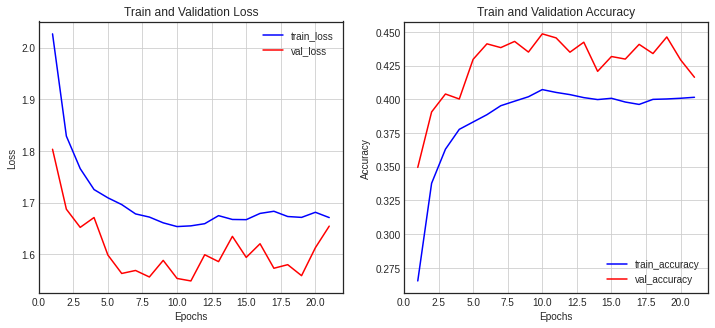

In [15]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [16]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_val, y_val)

313/313 [==============================] - 1s 2ms/step - loss: 1.5486 - accuracy: 0.4455


[1.5485721826553345, 0.445499986410141]

# 회고

* 여러가지로, 전의 reuster 에서 고생을 하다보니, 이번에는 실험을 많이 해보았던 CIFAR10이다.

조원분들이 덴스레이어와 배치,드랍아웃의 순서에 대해 말씀하셔서 알게 되었다.
덴스레이어,활성화,배치,활성화,드랍 이순서였다. 이순서를 하게되니 좀더 스무스하게 일어나는것같았다.

그리고, relu대신 마지막에 softmax를 쓰니 정확도가 0.1에서 0.44로 올라가는 엄청난 성능향상이 되는걸 느꼈다. 

하지만, cnn을 사용한 다른 코드도 보았는데 0.95의 엄청난 정확도를 보는것을 보고, 역시 cnn이 좋구나를 느꼇다.

```역시, 좀더 공부가 필요하다.```
